In [8]:
import numpy as np
import pandas as pd

Read Datafile

In [9]:
df=pd.read_csv('spam1.csv')

In [10]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3435,ham,If india win or level series means this is rec...,NaN,NaN,NaN
4259,ham,Are you plans with your family set in stone ?,NaN,NaN,NaN
431,ham,Does she usually take fifteen fucking minutes ...,NaN,NaN,NaN
1665,ham,Dunno cos i was v late n when i reach they ins...,NaN,NaN,NaN
4132,spam,FreeMsg Today's the day if you are ready! I'm ...,NaN,NaN,NaN


In [11]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.shape

(5572, 5)

Steps to Perform:

1.Data cleaning

2.EDA

3.Text Preprocessing

4.Model Buliding

5.Evaluation

6.Improvemnt

### 1.Data Cleaning 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [15]:
df.sample(5)

,v1,v2
130,ham,I'm home.
2217,ham,* Will have two more cartons off u and is very...
1149,ham,Not a drop in the tank
4504,spam,Mobile Club: Choose any of the top quality ite...
4203,ham,How are you enjoying this semester? Take care ...


Renaming columns

In [16]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4212,ham,I attended but nothing is there.
2494,ham,You at mu? You should try to figure out how mu...
1453,ham,Stupid.its not possible
510,ham,"8 at the latest, g's still there if you can sc..."
2010,ham,Dunno lei... I thk mum lazy to go out... I nev...


Convert Target column from categorical value to number

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [18]:
df['target']=encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Check for null values

In [20]:
df.isnull().sum()

target    0
text      0
dtype: int64

Check for Duplicates

In [21]:
df.duplicated().sum()

414

In [22]:
#remove duplicate
df=df.drop_duplicates(keep='first')
df.shape

(5158, 2)

### 2. EDA

In [23]:
 df['target'].value_counts()

0    4516
1     642
Name: target, dtype: int64

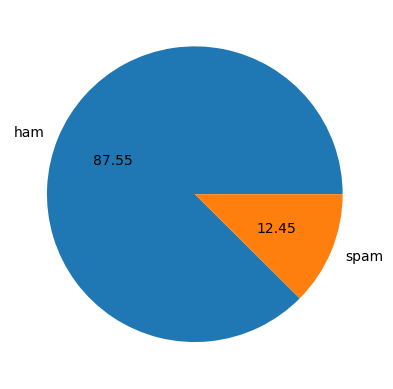

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

Data is imbalanced. Performing oversampling.

In [26]:
#class count 0-ham 1-spam
count_class_0,count_class_1=df.target.value_counts()
count_class_0,count_class_1

(4516, 642)

In [27]:
#Divide by class
df_class_0=df[df['target']==0]
df_class_1=df[df['target']==1]

In [28]:
df_class1_over=df_class_1.sample(count_class_0,replace=True)

In [29]:
df=pd.concat([df_class_0,df_class1_over],axis=0)
df.shape

(9032, 2)

In [31]:
print('Random over-sampling')
print(df['target'].value_counts())

Random over-sampling
0    4516
1    4516
Name: target, dtype: int64


In [32]:
import nltk
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
# ps.stem('loving')
from nltk.corpus import stopwords
#stopwords.words('english')

In [33]:
nltk.download('punkt')
#nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/anubhoyar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df['num_char']=df['text'].apply(len)

In [35]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
6,0,Even my brother is not like to speak with me. ...,77,18


In [37]:
df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,target,text,num_char,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2


In [39]:
df[['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,9032.000000,9032.000000,9032.000000
mean,103.925930,22.370128,2.384522
std,56.356879,11.993657,1.489027
min,2.000000,1.000000,1.000000
25%,49.000000,12.000000,1.000000
50%,114.000000,24.000000,2.000000
75%,152.000000,31.000000,3.000000
max,910.000000,220.000000,28.000000


In [40]:
#for ham msg
df[df['target']==0][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.449734,17.120903,1.799601
std,56.352902,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [41]:
#for spam msg
df[df['target']==1][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,137.402126,27.619353,2.969442
std,30.584993,7.108161,1.454651
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


spam msg are longer as compare to ham msg.

plot histogram

In [42]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

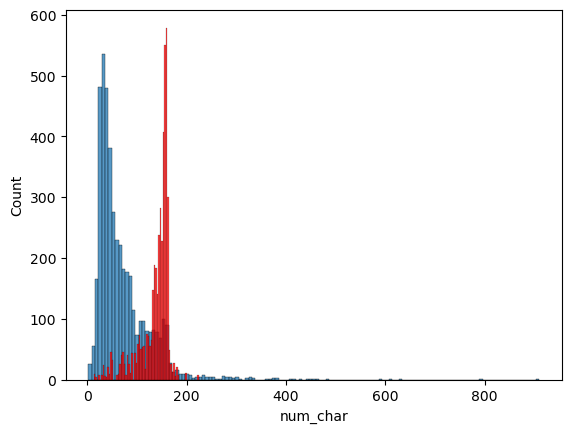

In [43]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

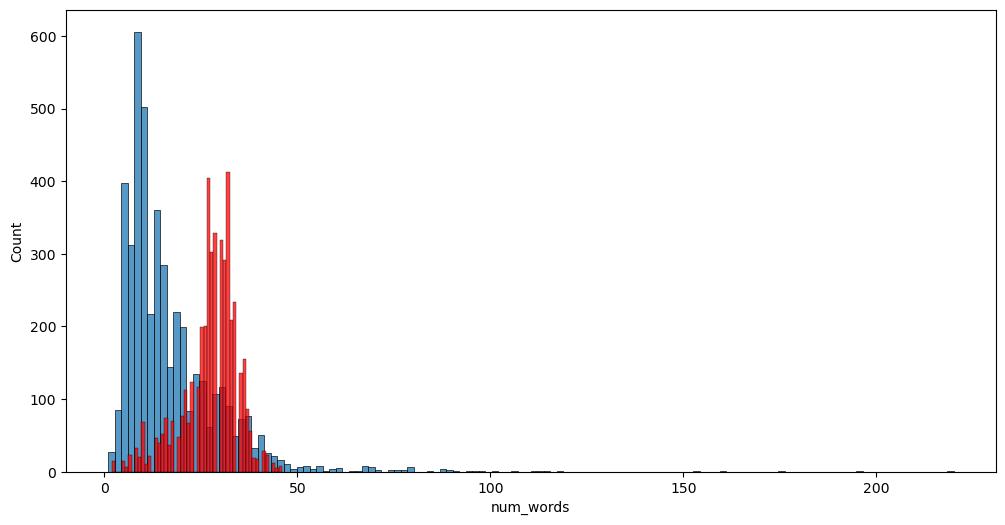

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

outliers are present

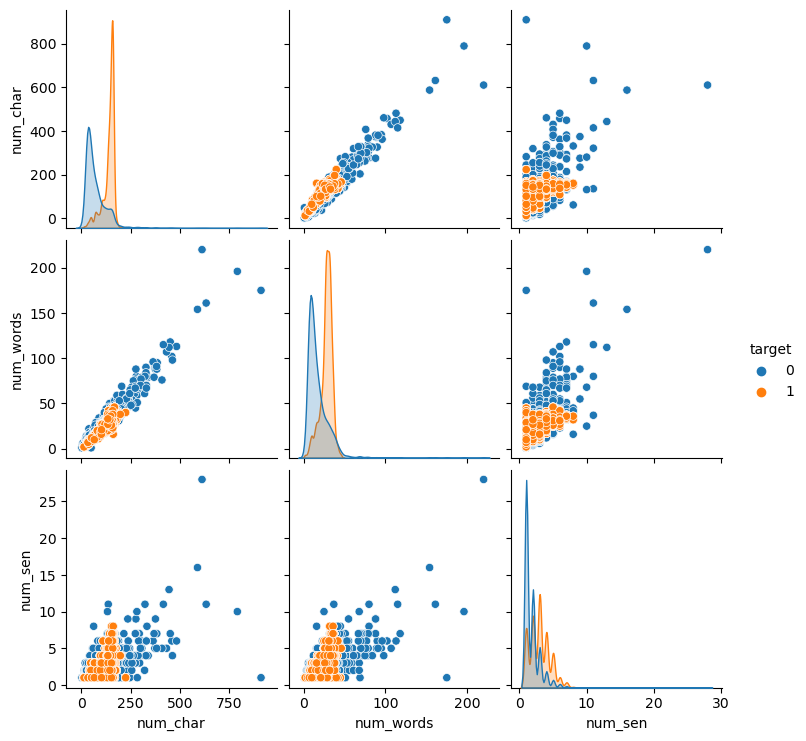

In [45]:
sns.pairplot(df,hue='target')

<Axes: >

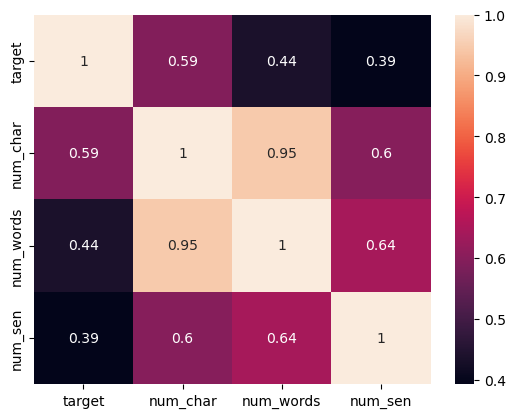

In [46]:
sns.heatmap(df.corr(),annot=True)

### 3.Data Preprocessing
  lower case,Tokenization,Removing special chars, removing stop words and   punctuation, stemming 

In [47]:
#from nltk.corpus import stopwords
#stopwords.words('english')
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [48]:
transform_text('Hi I am Nehita....hi How are you?')

'hi nehita hi'

In [49]:
df['transformed_text']=df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_char,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent


In [51]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [52]:
#spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

In [53]:
#plt.imshow(spam_wc)

In [54]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [55]:
len(spam_corpus)

68468

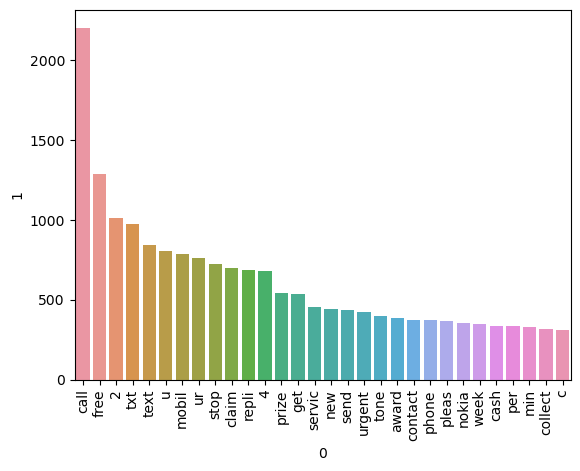

In [56]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35394

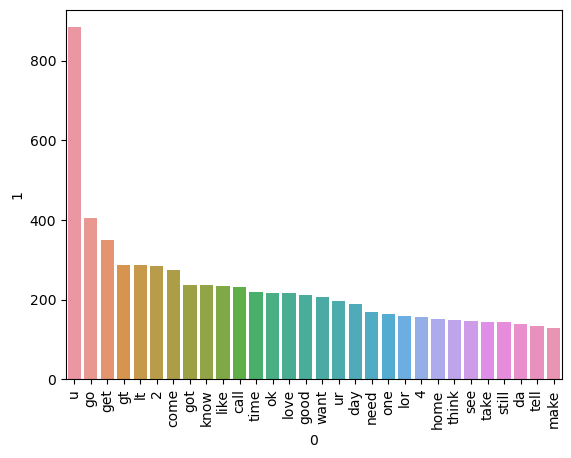

In [59]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4. Model Bulding

In [60]:
df.head()

,target,text,num_char,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent


In [61]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [62]:
#covert space array to dense array
#X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
X.shape


(9032, 3000)

In [64]:
y=df['target'].values

In [65]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [66]:
 from sklearn.model_selection import train_test_split   
 from sklearn.metrics import accuracy_score,confusion_matrix,precision_score   

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [69]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_predgnb=gnb.predict(X_test)
print(accuracy_score(y_test,y_predgnb))
print(confusion_matrix(y_test,y_predgnb))
print(precision_score(y_test,y_predgnb))

0.9811842833425567
[[900  17]
 [ 17 873]]
0.9808988764044944


In [71]:
mnb.fit(X_train,y_train)
y_predmnb=mnb.predict(X_test)
print(accuracy_score(y_test,y_predmnb))
print(confusion_matrix(y_test,y_predmnb))
print(precision_score(y_test,y_predmnb))

0.9717764250138351
[[886  31]
 [ 20 870]]
0.9655937846836848


In [72]:
bnb.fit(X_train,y_train)
y_predbnb=bnb.predict(X_test)
print(accuracy_score(y_test,y_predbnb))
print(confusion_matrix(y_test,y_predbnb))
print(precision_score(y_test,y_predbnb))

0.9833978970669618
[[917   0]
 [ 30 860]]
1.0


In [73]:
#tfidf with mnb is good with precision

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(C=1,solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [76]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [77]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [78]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9894853348090759, 0.9909808342728298)

In [79]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)                                                 

For  SVC
Accuracy -  0.9894853348090759
Precision -  0.9909808342728298
For  KN
Accuracy -  0.981737686773658
Precision -  0.9976771196283392
For  NB
Accuracy -  0.9717764250138351
Precision -  0.9655937846836848
For  DT
Accuracy -  0.8854454897620365
Precision -  0.9200492004920049
For  LR
Accuracy -  0.9828444936358606
Precision -  0.9820426487093153
For  RF
Accuracy -  0.9983397897066962
Precision -  0.9966405375139977
For  AdaBoost
Accuracy -  0.945213060320974
Precision -  0.9691577698695136
For  Bgc
Accuracy -  0.9762036524626453
Precision -  0.9539121114683816
For  ETC
Accuracy -  0.9994465965688988
Precision -  0.9988776655443322
For  GBDT
Accuracy -  0.9241837299391257
Precision -  0.9424206815511164
For  xgb
Accuracy -  0.9717764250138351
Precision -  0.9708193041526375


In [80]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [81]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.999447,0.998878
1,KN,0.981738,0.997677
5,RF,0.998340,0.996641
0,SVC,0.989485,0.990981
4,LR,0.982844,0.982043
10,xgb,0.971776,0.970819
6,AdaBoost,0.945213,0.969158
2,NB,0.971776,0.965594
7,Bgc,0.976204,0.953912
9,GBDT,0.924184,0.942421


In [82]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.999447
1,KN,Accuracy,0.981738
2,RF,Accuracy,0.998340
3,SVC,Accuracy,0.989485
4,LR,Accuracy,0.982844
5,xgb,Accuracy,0.971776
6,AdaBoost,Accuracy,0.945213
7,NB,Accuracy,0.971776
8,Bgc,Accuracy,0.976204
9,GBDT,Accuracy,0.924184


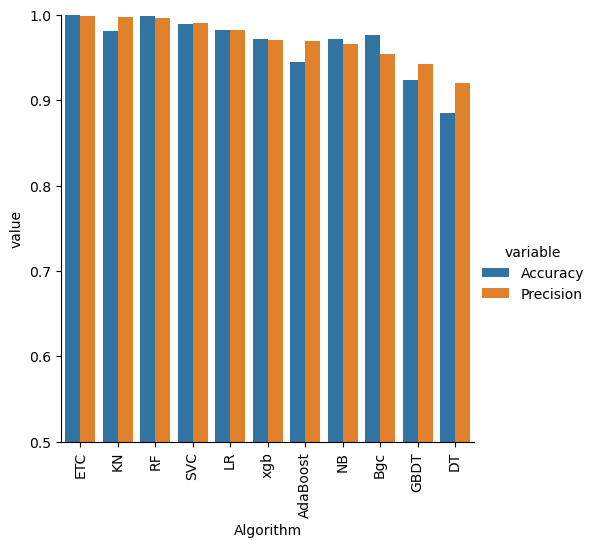

In [83]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
#improve model
#1.change max_feature for tfidf 

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [86]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [88]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.999447,0.998878,0.999447,0.998878,0.999447,0.998878,0.999447,0.998878
1,KN,0.981738,0.997677,0.981738,0.997677,0.981738,0.997677,0.981738,0.997677
2,RF,0.998340,0.996641,0.998340,0.996641,0.998340,0.996641,0.998340,0.996641
3,SVC,0.989485,0.990981,0.989485,0.990981,0.989485,0.990981,0.989485,0.990981
4,LR,0.982844,0.982043,0.982844,0.982043,0.982844,0.982043,0.982844,0.982043
5,xgb,0.971776,0.970819,0.971776,0.970819,0.971776,0.970819,0.971776,0.970819
6,AdaBoost,0.945213,0.969158,0.945213,0.969158,0.945213,0.969158,0.945213,0.969158
7,NB,0.971776,0.965594,0.971776,0.965594,0.971776,0.965594,0.971776,0.965594
8,Bgc,0.976204,0.953912,0.976204,0.953912,0.976204,0.953912,0.976204,0.953912
9,GBDT,0.924184,0.942421,0.924184,0.942421,0.924184,0.942421,0.924184,0.942421


In [89]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [90]:
input_sms='Accident Compensation you have still not claimed the compensation you are due for the accident you had. To start the process please reply Yes.To opt out text STOP.'
transformed_sms=transform_text(input_sms)
vector_input=tfidf.transform([transformed_sms])
result=mnb.predict(vector_input)[0]


In [91]:
if result==1:
    print('Spam',result)
else:
    print('Not Spam',result)


Spam 1
